In [554]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040673.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  2.319648  2.245357  2.173998  2.106549  2.043988  1.987292  1.936461   

          7         8         9  ...      4192      4193      4194      4195  \
0  1.890518  1.848485  1.811339  ...  2.599218  2.545455  2.484848  2.418377   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  2.325513  2.237537  2.173021  2.107527    164.577621       64.78247  

[1 rows x 4202 columns]
[164.57762112]  /  [64.78246975]
          0         1         2         3         4         5         6  \
0  2.319648  2.245357  2.173998  2.106549  2.043988  1.987292  1.936461   

          7         8         9  ...      4190      4191      4192      4193  \
0  1.890518  1.848485  1.811339  ...  2.680352  2.644184  2.599218  2.545455   

       4194      4195      4196      4197      4198      4199  
0  2.484848  2.418377  2.325513  2.237537  2.173021  2.107527  

[1 rows x 4200 columns]


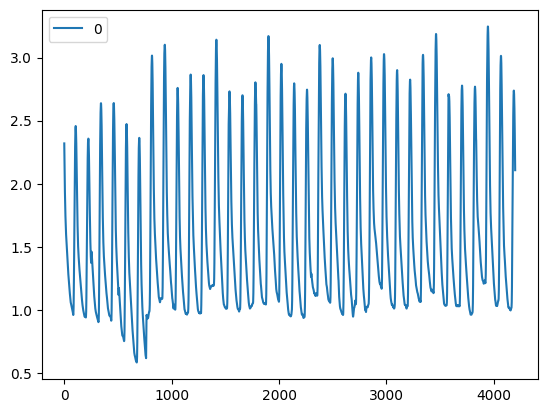

In [555]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [556]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

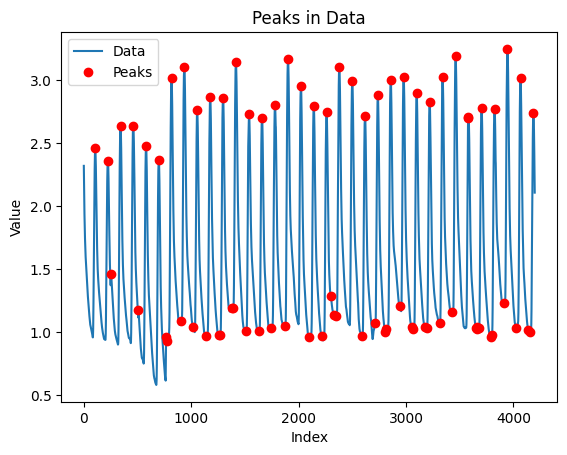

{'indices': array([ 106,  224,  254,  342,  460,  509,  580,  698,  767,  776,  817,
        904,  936, 1021, 1056, 1135, 1177, 1257, 1270, 1297, 1376, 1386,
       1416, 1506, 1539, 1634, 1659, 1744, 1780, 1870, 1901, 2022, 2093,
       2141, 2217, 2261, 2301, 2330, 2348, 2378, 2500, 2591, 2619, 2711,
       2738, 2803, 2816, 2858, 2941, 2978, 3054, 3066, 3099, 3179, 3194,
       3220, 3313, 3341, 3427, 3462, 3579, 3582, 3653, 3657, 3664, 3678,
       3704, 3788, 3798, 3825, 3915, 3945, 4026, 4067, 4138, 4151, 4186]), 'values': array([2.45747801, 2.35777126, 1.46138807, 2.63831867, 2.63929619,
       1.17399804, 2.47311828, 2.36363636, 0.96089932, 0.93450635,
       3.01564027, 1.09384164, 3.10166178, 1.04301075, 2.75953079,
       0.971652  , 2.86510264, 0.97751711, 0.97947214, 2.86119257,
       1.1945259 , 1.1945259 , 3.14173998, 1.01466276, 2.73216031,
       1.00879765, 2.70087977, 1.03323558, 2.80351906, 1.05376344,
       3.17008798, 2.95014663, 0.9657869 , 2.79569892, 0.968719

In [557]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [559]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.4574780058651027, 2.357771260997068, None, 2.638318670576735, 2.6392961876832843, None, 2.4731182795698925, 2.363636363636364, None, None, 3.01564027370479, None, 3.101661779081134, None, 2.7595307917888565, None, 2.865102639296188, None, None, 2.8611925708699903, None, None, 3.1417399804496577, None, 2.732160312805474, None, 2.7008797653958942, None, 2.803519061583578, None, 3.1700879765395893, 2.9501466275659824, None, 2.795698924731183, None, 2.745845552297165, None, None, None, 3.099706744868035, 2.994134897360704, None, 2.713587487781036, None, 2.8797653958944283, None, None, 3.0009775171065494, None, 3.027370478983382, None, None, 2.900293255131965, None, None, 2.825024437927664, None, 3.021505376344086, None, 3.1867057673509285, 2.7096774193548385, 2.696969696969697, None, None, None, None, 2.7781036168132944, None, None, 2.76930596285435, None, 3.24633431085044, None, 3.013685239491691, None, None, 2.73802541544477]
[None, None, 1.4613880742913, None, None, 1.173998044965787

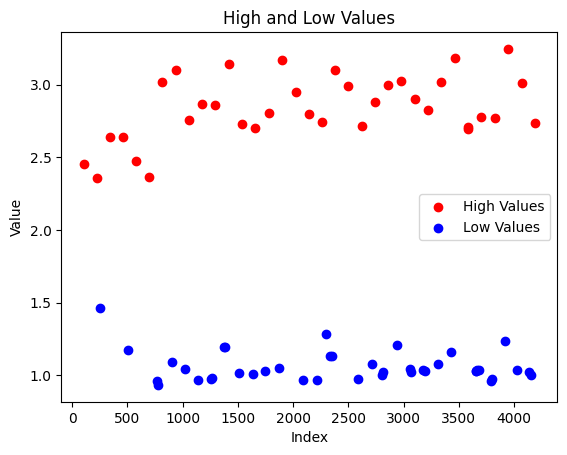

In [560]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [561]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.8381666123601605
Average Low Value: 1.0638485563741267


In [566]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=3, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [567]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.8381666123601605 : 0.9460555374533869
Scaled value of 1.0638485563741267 : 0.35461618545804224
